<a href="https://colab.research.google.com/github/Mickhelgoh/BrainTumor/blob/main/Epoch%26BatchSize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mickhel","key":"d56d36a095e432814b8192ac423f74ef"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d 'sartajbhuvaji/brain-tumor-classification-mri'

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 96% 83.0M/86.8M [00:00<00:00, 194MB/s]
100% 86.8M/86.8M [00:00<00:00, 192MB/s]


In [4]:
import zipfile,os,shutil

In [5]:
filezip = '/content/brain-tumor-classification-mri.zip'
extraczip = zipfile.ZipFile(filezip,'r')
extraczip.extractall('dataset')

In [6]:
os.listdir("/content/dataset")

['Training', 'Testing']

In [7]:
for dirname, _, filenames in os.walk('/content/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/dataset/Training/glioma_tumor/gg (501).jpg
/content/dataset/Training/glioma_tumor/gg (801).jpg
/content/dataset/Training/glioma_tumor/gg (728).jpg
/content/dataset/Training/glioma_tumor/gg (735).jpg
/content/dataset/Training/glioma_tumor/gg (753).jpg
/content/dataset/Training/glioma_tumor/gg (170).jpg
/content/dataset/Training/glioma_tumor/gg (711).jpg
/content/dataset/Training/glioma_tumor/gg (575).jpg
/content/dataset/Training/glioma_tumor/gg (48).jpg
/content/dataset/Training/glioma_tumor/gg (671).jpg
/content/dataset/Training/glioma_tumor/gg (686).jpg
/content/dataset/Training/glioma_tumor/gg (264).jpg
/content/dataset/Training/glioma_tumor/gg (496).jpg
/content/dataset/Training/glioma_tumor/gg (677).jpg
/content/dataset/Training/glioma_tumor/gg (36).jpg
/content/dataset/Training/glioma_tumor/gg (141).jpg
/content/dataset/Training/glioma_tumor/gg (541).jpg
/content/dataset/Training/glioma_tumor/gg (421).jpg
/content/dataset/Training/glioma_tumor/gg (808).jpg
/content/datas

# EPOCH 5

100%|██████████| 74/74 [00:00<00:00, 360.94it/s]


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 992ms/step - accuracy: 0.4740 - loss: 13.8348
Epoch 1: val_accuracy improved from -inf to 0.66055, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.4752 - loss: 13.8084 - val_accuracy: 0.6606 - val_loss: 8.8660 - learning_rate: 0.0010
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.7374 - loss: 7.6121
Epoch 2: val_accuracy improved from 0.66055 to 0.84404, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.7375 - loss: 7.6054 - val_accuracy: 0.8440 - val_loss: 5.5488 - learning_rate: 0.0010
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.7974 - loss: 5.3256
Epoch 3: val_accuracy improved from 0.84404 to 0.85321, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 190ms/step - accuracy: 0.7976 - loss: 5.3214 - val_accuracy: 

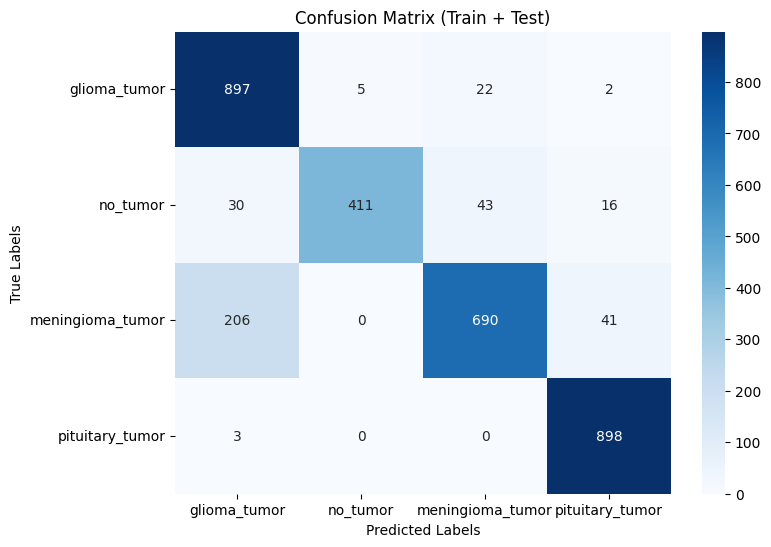

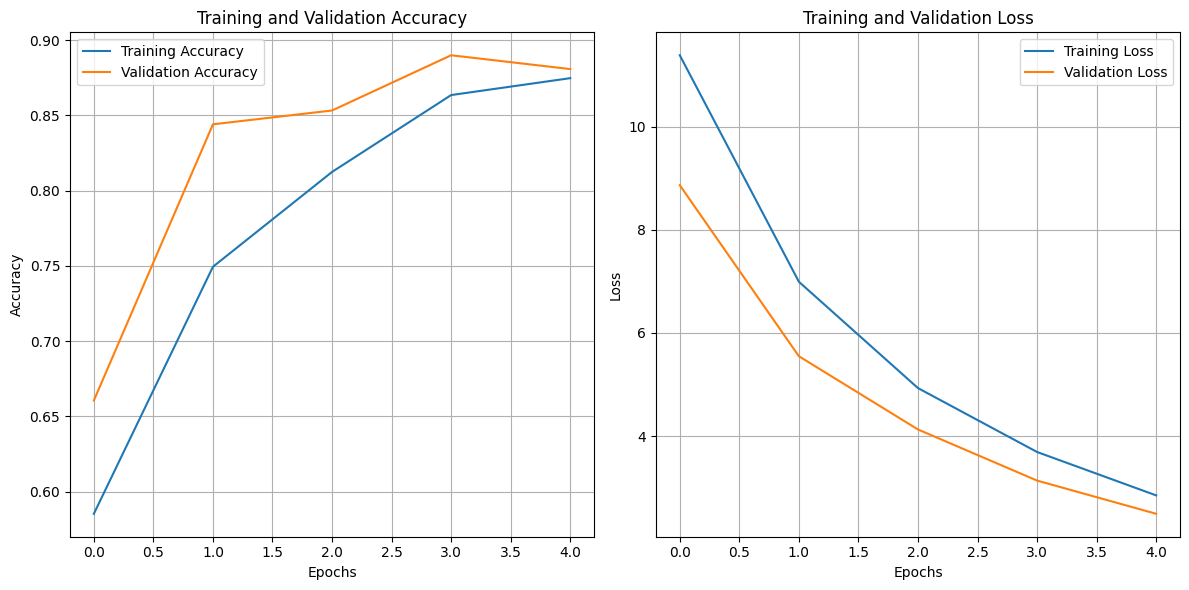

In [ ]:
# Import libraries
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 and VGG16 base models without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in densenet121.layers[:100]:
    layer.trainable = False
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from both models
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([densenet_out, vgg_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model6 = Model(inputs=[densenet121.input, vgg16.input], outputs=output_layer)
# Compile the model with SGD optimizer
model6.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model6_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history6 = model6.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=5,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model6.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model6.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)
# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# EPOCH 10

100%|██████████| 74/74 [00:00<00:00, 375.24it/s]


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.4780 - loss: 13.8229
Epoch 1: val_accuracy improved from -inf to 0.59327, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 198s 995ms/step - accuracy: 0.4793 - loss: 13.7969 - val_accuracy: 0.5933 - val_loss: 9.2324 - learning_rate: 0.0010
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.7796 - loss: 7.5821
Epoch 2: val_accuracy improved from 0.59327 to 0.86544, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - accuracy: 0.7797 - loss: 7.5753 - val_accuracy: 0.8654 - val_loss: 5.5111 - learning_rate: 0.0010
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.8369 - loss: 5.2909
Epoch 3: val_accuracy improved from 0.86544 to 0.88685, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - accuracy: 0.8370 - loss: 5.2868 - val_accuracy: 0.8869 - val_loss: 4.1249 - learning_rate: 0.0010
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms

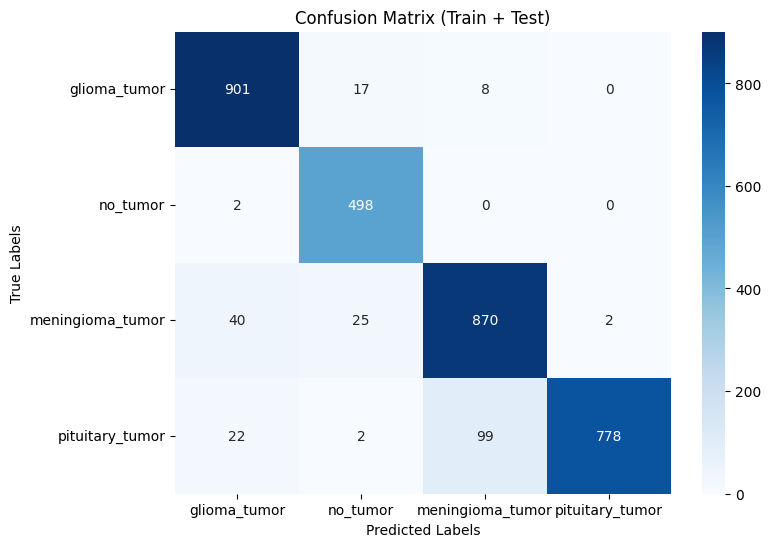

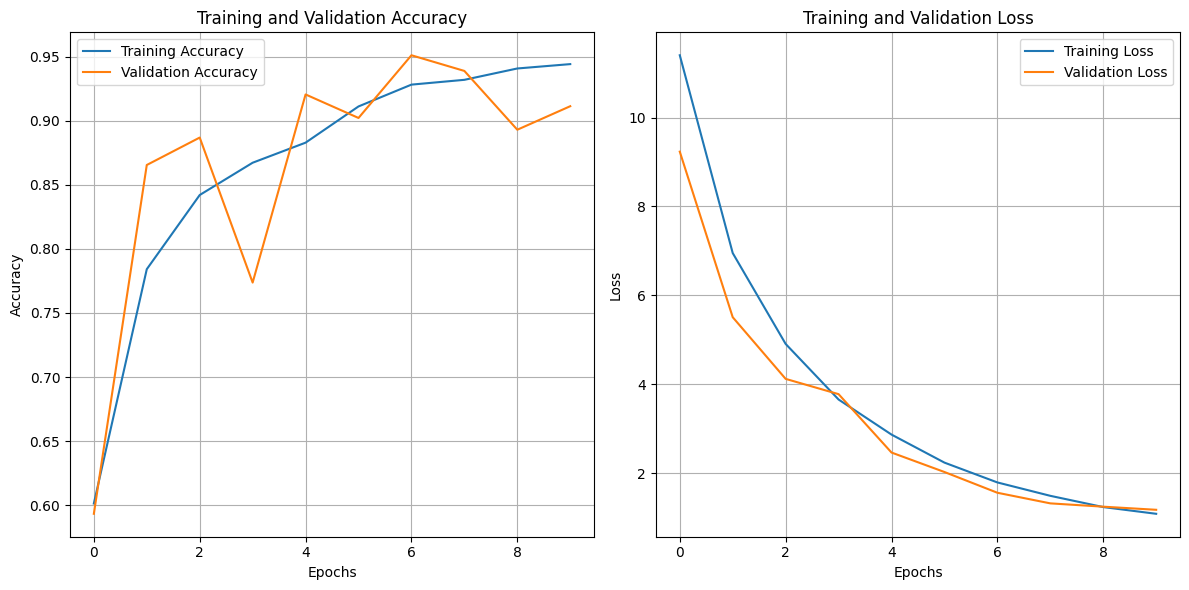

In [ ]:
# Import libraries
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 and VGG16 base models without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in densenet121.layers[:100]:
    layer.trainable = False
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from both models
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([densenet_out, vgg_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model6 = Model(inputs=[densenet121.input, vgg16.input], outputs=output_layer)
# Compile the model with SGD optimizer
model6.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model6_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history6 = model6.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model6.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model6.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)
# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# EPOCH 20

100%|██████████| 74/74 [00:00<00:00, 348.37it/s]


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 713ms/step - accuracy: 0.4770 - loss: 13.9019
Epoch 1: val_accuracy improved from -inf to 0.72171, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 180s 880ms/step - accuracy: 0.4783 - loss: 13.8754 - val_accuracy: 0.7217 - val_loss: 8.3915 - learning_rate: 0.0010
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.7427 - loss: 7.6756
Epoch 2: val_accuracy did not improve from 0.72171
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.7429 - loss: 7.6686 - val_accuracy: 0.6300 - val_loss: 7.2888 - learning_rate: 0.0010
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.8116 - loss: 5.2757
Epoch 3: val_accuracy improved from 0.72171 to 0.77064, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 196ms/step - accuracy: 0.8118 - loss: 5.2714 - val_accuracy: 0.7706 - val_loss: 4.4063 - learning_rate: 0.0010
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.8508 - loss: 3.8664

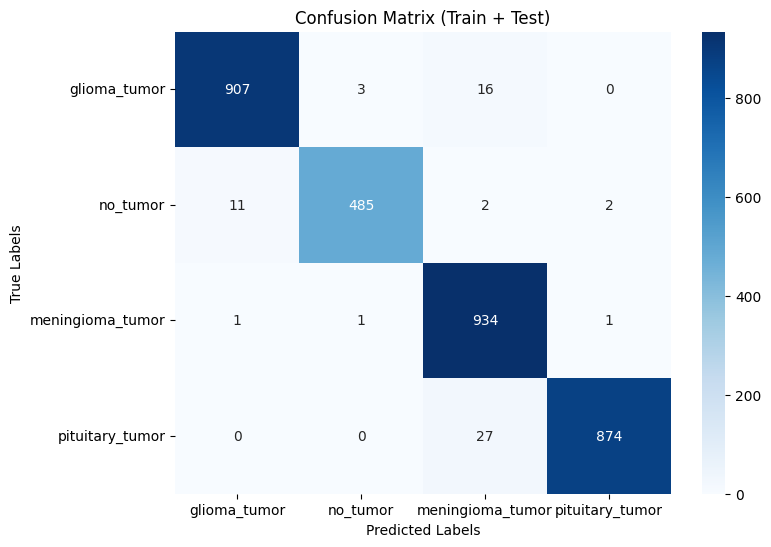

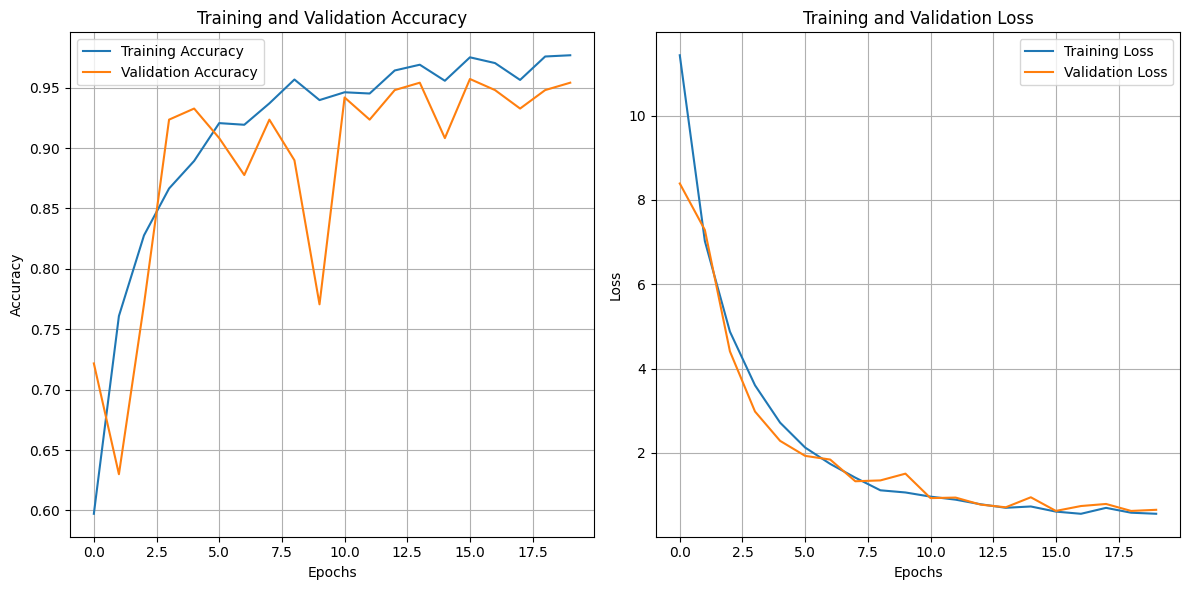

In [ ]:
# Import libraries
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 and VGG16 base models without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in densenet121.layers[:100]:
    layer.trainable = False
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from both models
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([densenet_out, vgg_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model6 = Model(inputs=[densenet121.input, vgg16.input], outputs=output_layer)
# Compile the model with SGD optimizer
model6.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model6_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history6 = model6.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model6.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model6.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)
# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# EPOCH 30

100%|██████████| 74/74 [00:00<00:00, 362.04it/s]


Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.4448 - loss: 13.9638
Epoch 1: val_accuracy improved from -inf to 0.65138, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.4459 - loss: 13.9380 - val_accuracy: 0.6514 - val_loss: 8.8667 - learning_rate: 0.0010
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.7125 - loss: 7.8240
Epoch 2: val_accuracy did not improve from 0.65138
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 178ms/step - accuracy: 0.7129 - loss: 7.8170 - val_accuracy: 0.5107 - val_loss: 7.8153 - learning_rate: 0.0010
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.7962 - loss: 5.4749
Epoch 3: val_accuracy improved from 0.65138 to 0.90214, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 218ms/step - accuracy: 0.7964 - loss: 5.4703 - val_accuracy: 0.9021 - val_loss: 4.0710 - learning_rate: 0.0010
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8708 - loss: 3.9257
Ep

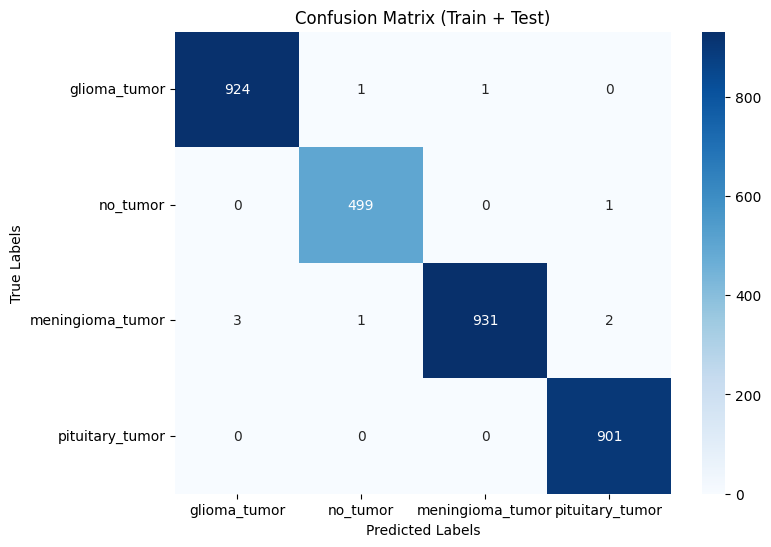

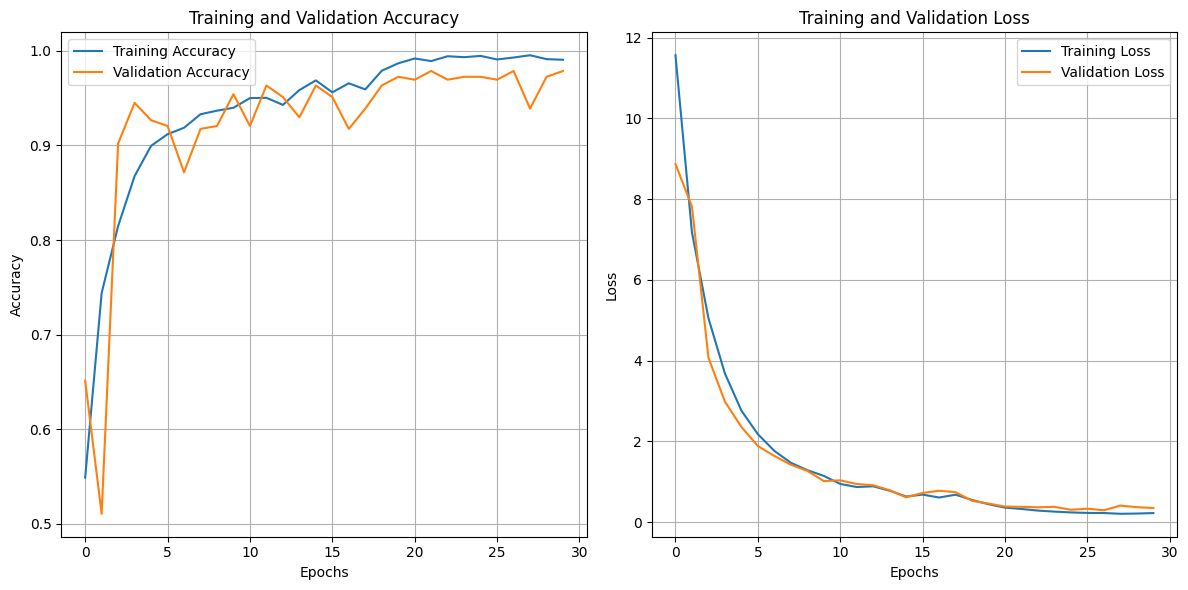

In [ ]:
# Import libraries
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 and VGG16 base models without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in densenet121.layers[:100]:
    layer.trainable = False
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from both models
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([densenet_out, vgg_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model6 = Model(inputs=[densenet121.input, vgg16.input], outputs=output_layer)
# Compile the model with SGD optimizer
model6.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model6_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history6 = model6.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model6.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model6.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)
# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# EPOCH 40

100%|██████████| 74/74 [00:00<00:00, 294.98it/s]


Epoch 1/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4806 - loss: 13.9372   
Epoch 1: val_accuracy improved from -inf to 0.35780, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.4818 - loss: 13.9109 - val_accuracy: 0.3578 - val_loss: 15.1307 - learning_rate: 0.0010
Epoch 2/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.7534 - loss: 7.6871
Epoch 2: val_accuracy improved from 0.35780 to 0.77982, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 79s 212ms/step - accuracy: 0.7535 - loss: 7.6801 - val_accuracy: 0.7798 - val_loss: 6.0150 - learning_rate: 0.0010
Epoch 3/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.7830 - loss: 5.4673
Epoch 3: val_accuracy did not improve from 0.77982
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.7833 - loss: 5.4622 - val_accuracy: 0.7798 - val_loss: 4.4718 - learning_rate: 0.0010
Epoch 4/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.8821 - loss: 3.8194
E

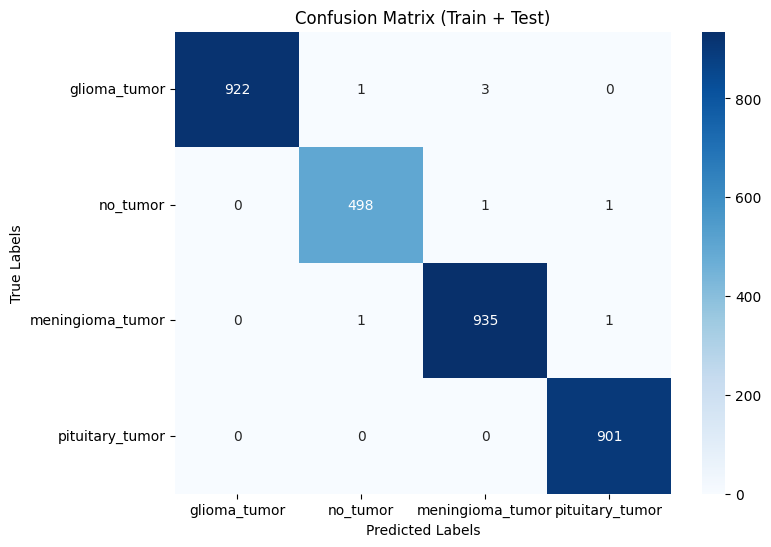

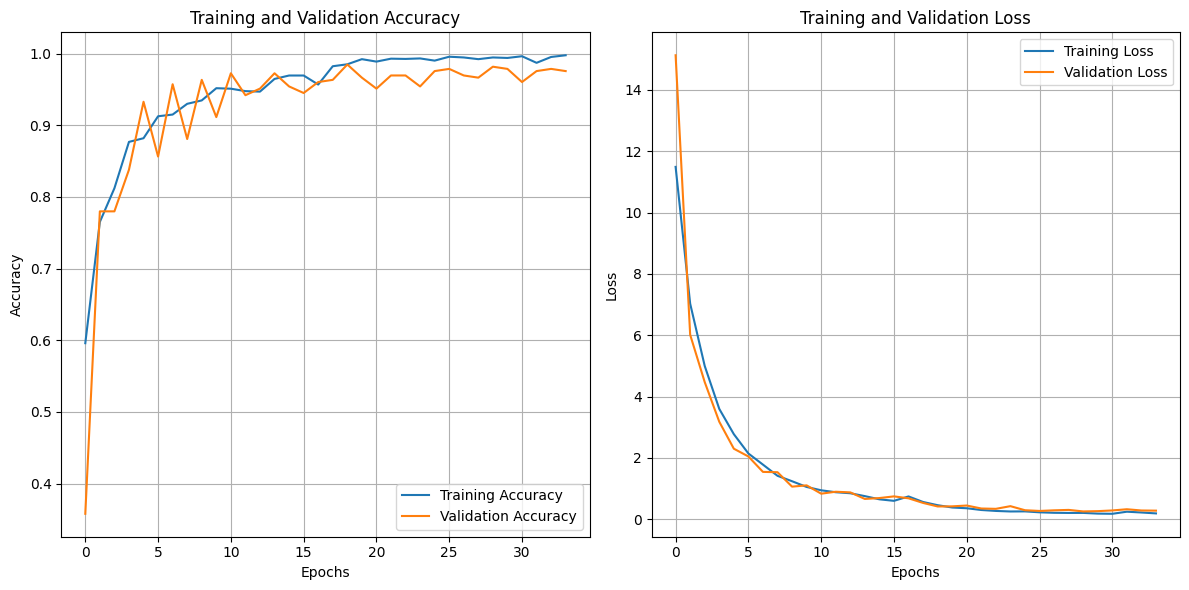

In [ ]:
# Import libraries
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 and VGG16 base models without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in densenet121.layers[:100]:
    layer.trainable = False
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from both models
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([densenet_out, vgg_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model6 = Model(inputs=[densenet121.input, vgg16.input], outputs=output_layer)
# Compile the model with SGD optimizer
model6.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model6_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history6 = model6.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=40,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model6.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model6.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)
# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# BATCH SIZE 8

100%|██████████| 74/74 [00:00<00:00, 342.26it/s]


Epoch 1/40
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.4551 - loss: 11.4061
Epoch 1: val_accuracy improved from -inf to 0.70031, saving model to model6_best.keras
368/368 ━━━━━━━━━━━━━━━━━━━━ 249s 329ms/step - accuracy: 0.4552 - loss: 11.4012 - val_accuracy: 0.7003 - val_loss: 7.0142 - learning_rate: 0.0010
Epoch 2/40
367/368 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5653 - loss: 6.8076
Epoch 2: val_accuracy improved from 0.70031 to 0.76453, saving model to model6_best.keras
368/368 ━━━━━━━━━━━━━━━━━━━━ 89s 83ms/step - accuracy: 0.5653 - loss: 6.8047 - val_accuracy: 0.7645 - val_loss: 4.9000 - learning_rate: 0.0010
Epoch 3/40
367/368 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5957 - loss: 4.9585
Epoch 3: val_accuracy improved from 0.76453 to 0.81346, saving model to model6_best.keras
368/368 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.5958 - loss: 4.9566 - val_accuracy: 0.8135 - val_loss: 3.6050 - learning_rate: 0.0010
Epoch 4/40
367/368 ━━━━━━━━━━━━━━━━━━━

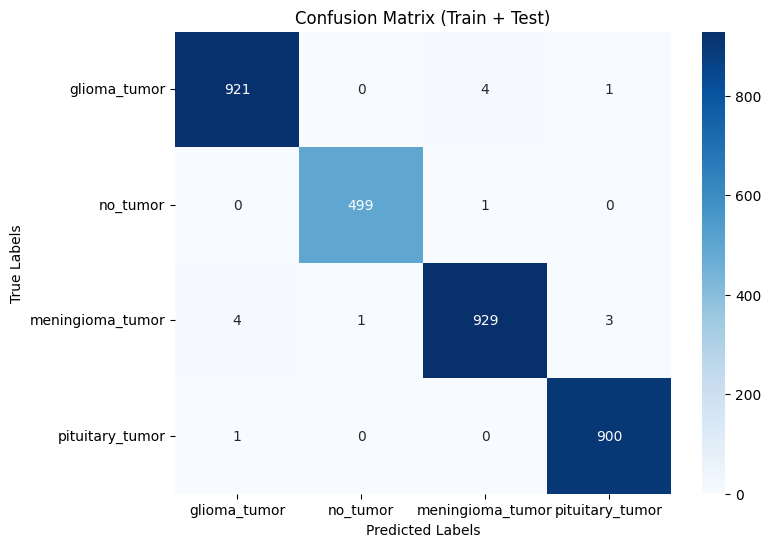

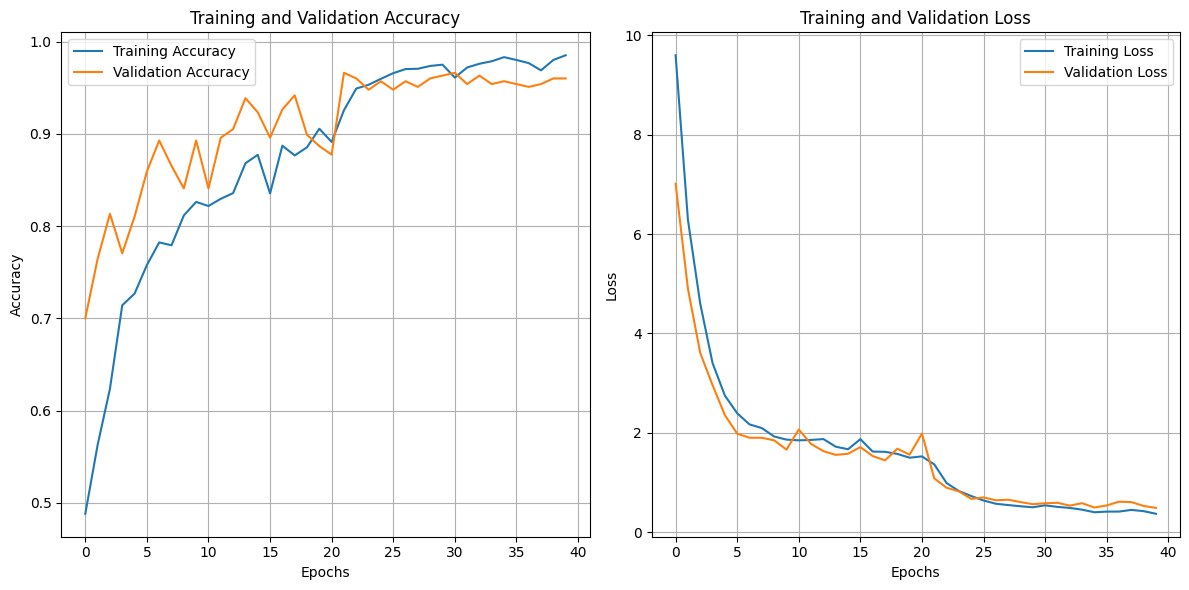

In [10]:
# Import libraries
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 and VGG16 base models without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in densenet121.layers[:100]:
    layer.trainable = False
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from both models
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([densenet_out, vgg_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model6 = Model(inputs=[densenet121.input, vgg16.input], outputs=output_layer)
# Compile the model with SGD optimizer
model6.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model6_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history6 = model6.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=40,
    batch_size=8,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model6.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model6.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)
# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# BATCH SIZE 16

100%|██████████| 74/74 [00:00<00:00, 352.38it/s]


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/40
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.4613 - loss: 12.6709
Epoch 1: val_accuracy improved from -inf to 0.78287, saving model to model6_best.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 238s 630ms/step - accuracy: 0.4618 - loss: 12.6587 - val_accuracy: 0.7829 - val_loss: 7.4092 - learning_rate: 0.0010
Epoch 2/40
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6802 - loss: 7.1106
Epoch 2: val_accuracy did not improve from 0.78287
184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.6803 - loss: 7.1073 - val_accuracy: 0.7523 - val_loss: 5.4997 - learning_rate: 0.0010
Epoch 3/40
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7703 - loss: 4.8895
Epoch 3: val_accuracy improved from 0.78287 to 0.85933, saving model to model6_best.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.7704 - loss: 4.8874 - val_accuracy: 0.8593 - val_loss: 3.65

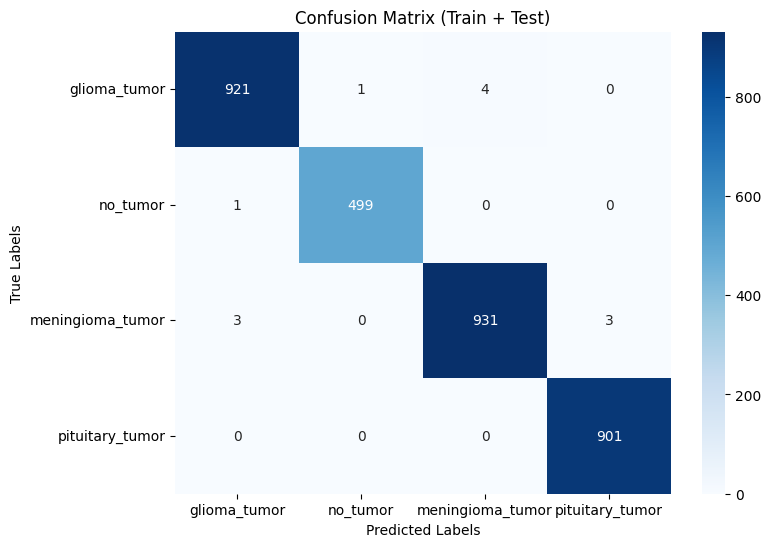

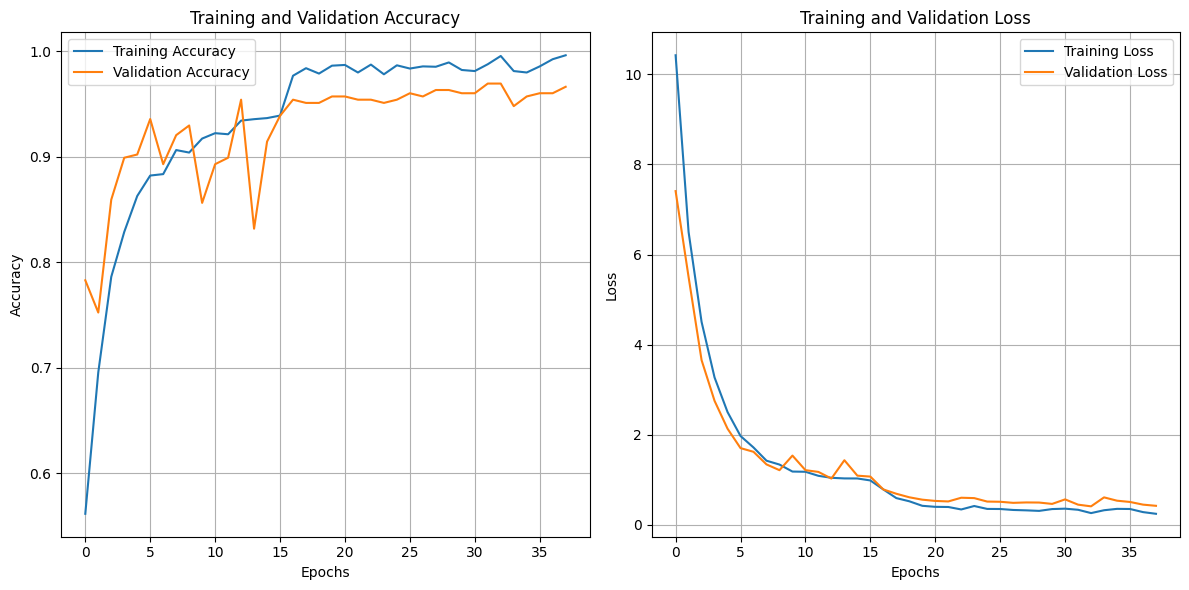

In [8]:
# Import libraries
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 and VGG16 base models without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in densenet121.layers[:100]:
    layer.trainable = False
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from both models
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([densenet_out, vgg_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model6 = Model(inputs=[densenet121.input, vgg16.input], outputs=output_layer)
# Compile the model with SGD optimizer
model6.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model6_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history6 = model6.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=40,
    batch_size=16,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model6.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model6.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)
# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# BATCH SIZE 32

100%|██████████| 74/74 [00:00<00:00, 294.98it/s]


Epoch 1/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4806 - loss: 13.9372   
Epoch 1: val_accuracy improved from -inf to 0.35780, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.4818 - loss: 13.9109 - val_accuracy: 0.3578 - val_loss: 15.1307 - learning_rate: 0.0010
Epoch 2/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.7534 - loss: 7.6871
Epoch 2: val_accuracy improved from 0.35780 to 0.77982, saving model to model6_best.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 79s 212ms/step - accuracy: 0.7535 - loss: 7.6801 - val_accuracy: 0.7798 - val_loss: 6.0150 - learning_rate: 0.0010
Epoch 3/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.7830 - loss: 5.4673
Epoch 3: val_accuracy did not improve from 0.77982
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.7833 - loss: 5.4622 - val_accuracy: 0.7798 - val_loss: 4.4718 - learning_rate: 0.0010
Epoch 4/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.8821 - loss: 3.8194
E

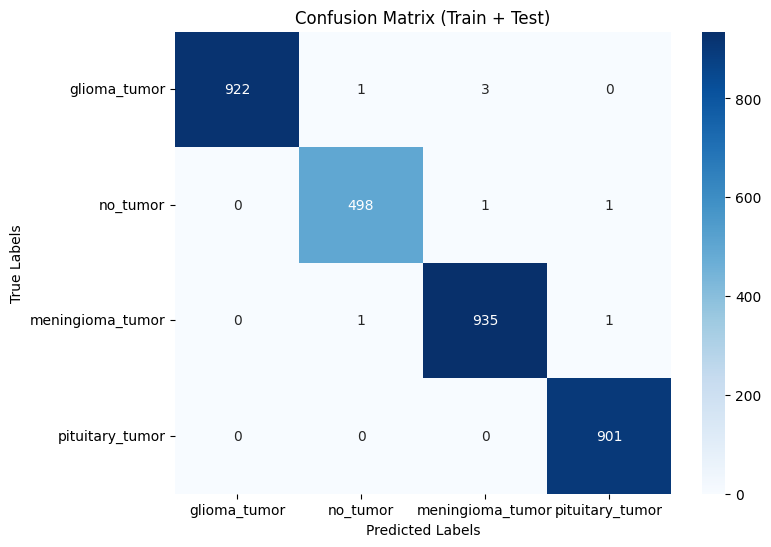

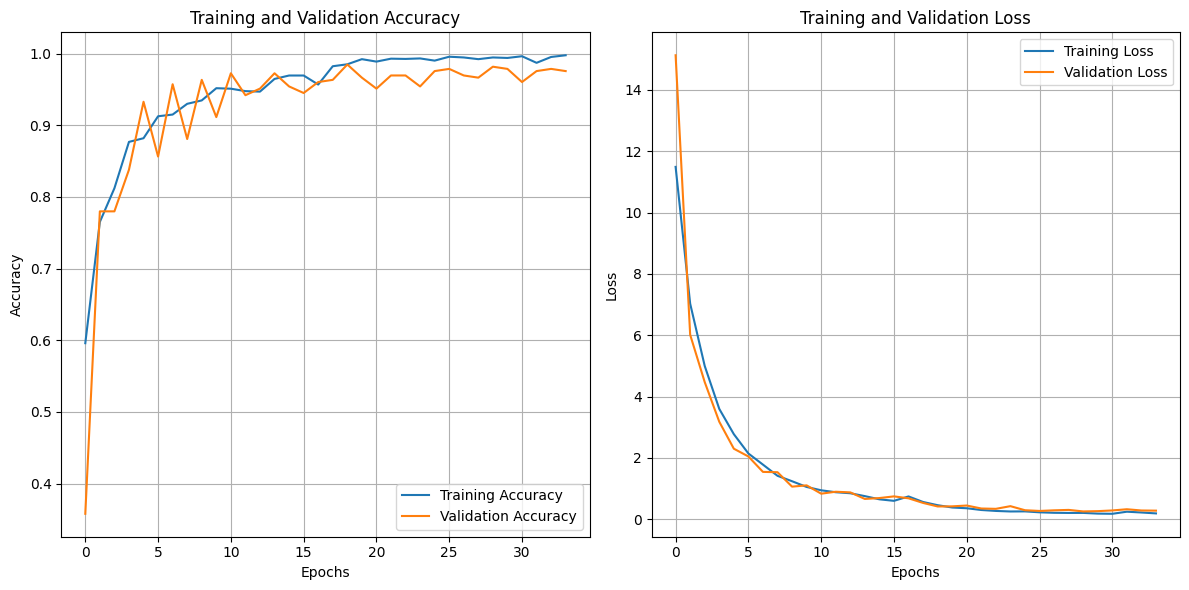

In [ ]:
# Import libraries
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 and VGG16 base models without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in densenet121.layers[:100]:
    layer.trainable = False
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from both models
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([densenet_out, vgg_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model6 = Model(inputs=[densenet121.input, vgg16.input], outputs=output_layer)
# Compile the model with SGD optimizer
model6.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model6_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history6 = model6.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=40,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model6.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model6.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)
# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# BATCH SIZE 64

100%|██████████| 74/74 [00:00<00:00, 342.37it/s]


Epoch 1/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4597 - loss: 15.0303   
Epoch 1: val_accuracy improved from -inf to 0.14679, saving model to model6_best.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.4623 - loss: 14.9810 - val_accuracy: 0.1468 - val_loss: 20.5128 - learning_rate: 0.0010
Epoch 2/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.8172 - loss: 8.4029
Epoch 2: val_accuracy improved from 0.14679 to 0.53211, saving model to model6_best.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 359ms/step - accuracy: 0.8174 - loss: 8.3888 - val_accuracy: 0.5321 - val_loss: 10.7659 - learning_rate: 0.0010
Epoch 3/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.8590 - loss: 5.9348
Epoch 3: val_accuracy improved from 0.53211 to 0.80122, saving model to model6_best.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 364ms/step - accuracy: 0.8593 - loss: 5.9259 - val_accuracy: 0.8012 - val_loss: 5.1670 - learning_rate: 0.0010
Epoch 4/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/

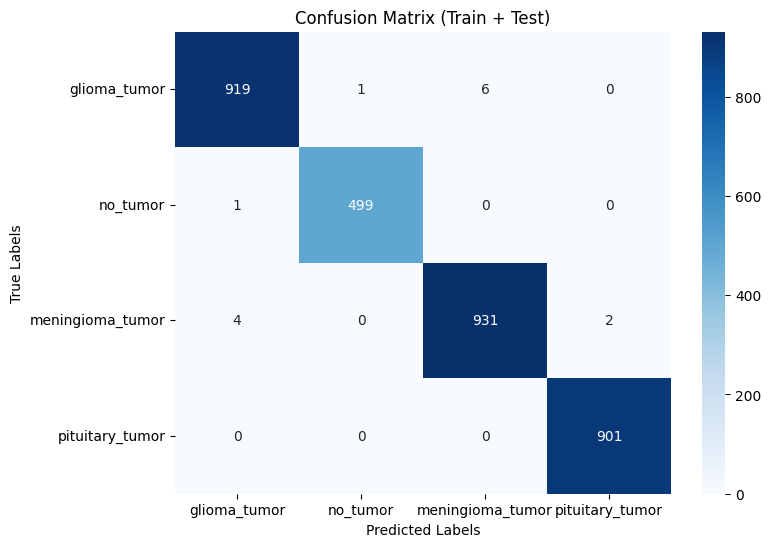

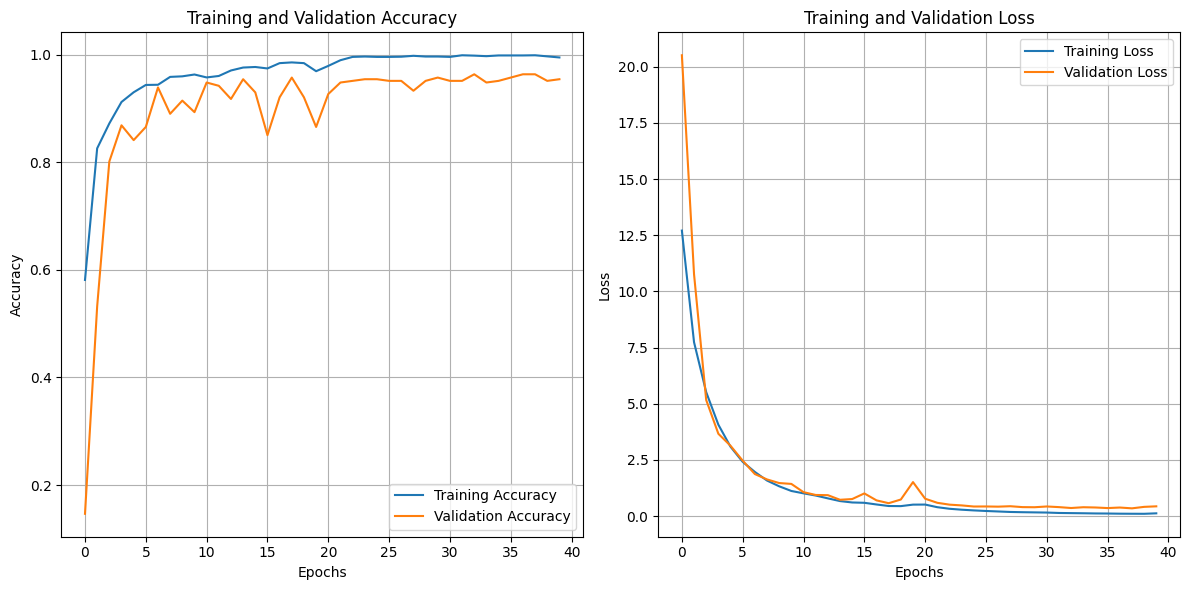

In [9]:
# Import libraries
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset paths
TRAIN_PATH = '/content/dataset/Training'
TEST_PATH = '/content/dataset/Testing'
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
X = []
y = []
image_size = 150

# Load the dataset
for label in labels:
    folder_path = os.path.join(TRAIN_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

for label in labels:
    folder_path = os.path.join(TEST_PATH, label)
    for img_file in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Convert labels to integers
y = np.array([labels.index(label) for label in y])
y = tf.keras.utils.to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load DenseNet121 and VGG16 base models without top layers
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of both models (Gradual Unfreezing)
for layer in densenet121.layers[:100]:
    layer.trainable = False
for layer in vgg16.layers[:100]:
    layer.trainable = False

# Extract features from both models
densenet_out = GlobalAveragePooling2D()(densenet121.output)
densenet_out = Dropout(rate=0.5)(densenet_out)  # Increase dropout

vgg_out = GlobalAveragePooling2D()(vgg16.output)
vgg_out = Dropout(rate=0.5)(vgg_out)  # Increase dropout

# Concatenate the outputs of both models
concatenated = Concatenate()([densenet_out, vgg_out])

# Add Dense layers after concatenation with regularization, batch normalization, and dropout
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(concatenated)  # Increased L2 regularization
x = Dropout(0.5)(x)  # Increased dropout
x = BatchNormalization()(x)

x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout

# Output layer with softmax activation (4 classes)
output_layer = Dense(4, activation="softmax")(x)

# Create the final model
model6 = Model(inputs=[densenet121.input, vgg16.input], outputs=output_layer)
# Compile the model with SGD optimizer
model6.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("model6_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model using the datagen.flow method
history6 = model6.fit(
    x=[X_train, X_train],
    y=y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=40,
    batch_size=64,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Get predictions for both training and testing sets (combined for classification report and confusion matrix)
train_predictions = model6.predict([X_train, X_train])
train_predictions = np.argmax(train_predictions, axis=-1)

train_true_labels = np.argmax(y_train, axis=-1)

test_predictions = model6.predict([X_test, X_test])
test_predictions = np.argmax(test_predictions, axis=-1)

test_true_labels = np.argmax(y_test, axis=-1)
# Combine both the predictions and true labels of training and testing data
combined_predictions = np.concatenate([train_predictions, test_predictions])
combined_true_labels = np.concatenate([train_true_labels, test_true_labels])

# Classification report for the combined data (train + test)
print("Classification Report (Train + Test):")
print(classification_report(combined_true_labels, combined_predictions, target_names=labels))

# Confusion matrix for the combined data (train + test)
cm_combined = confusion_matrix(combined_true_labels, combined_predictions)

# Plot confusion matrix for the combined data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train + Test)')
plt.show()

# Plot training and validation accuracy and loss together
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()